In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error, r2_score)




### 1. Run the feature engineering file to get the train, val, test set

[*********************100%***********************]  1 of 1 completed


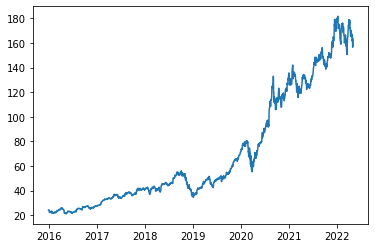

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1573 non-null   datetime64[ns]
 1   D_m3       1573 non-null   float64       
 2   D_m2       1573 non-null   float64       
 3   D_m1       1573 non-null   float64       
 4   Adj Close  1573 non-null   float64       
 5   bb_m1      1573 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 73.9 KB
           Date
0    2016-02-02
1    2016-02-03
2    2016-02-04
3    2016-02-05
4    2016-02-08
...         ...
1567 2022-04-22
1568 2022-04-25
1569 2022-04-26
1570 2022-04-27
1571 2022-04-28

[1572 rows x 1 columns]
         bb_m1      D_m3      D_m2      D_m1
0    -0.105414  0.007171  0.034542 -0.009349
1    -0.134903  0.034542 -0.009349 -0.020222
2    -0.108551 -0.009349 -0.020222  0.019792
3    -0.060615 -0.020222  0.019792  0.008035
4     0.042268  

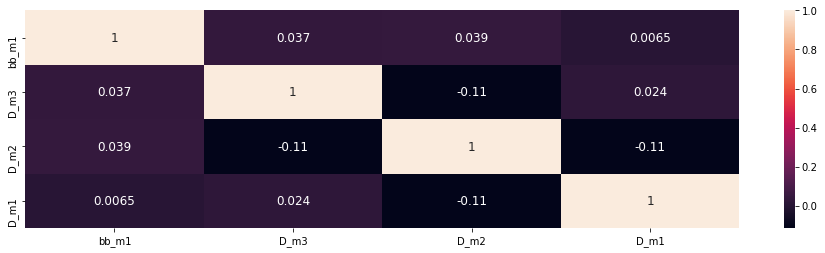

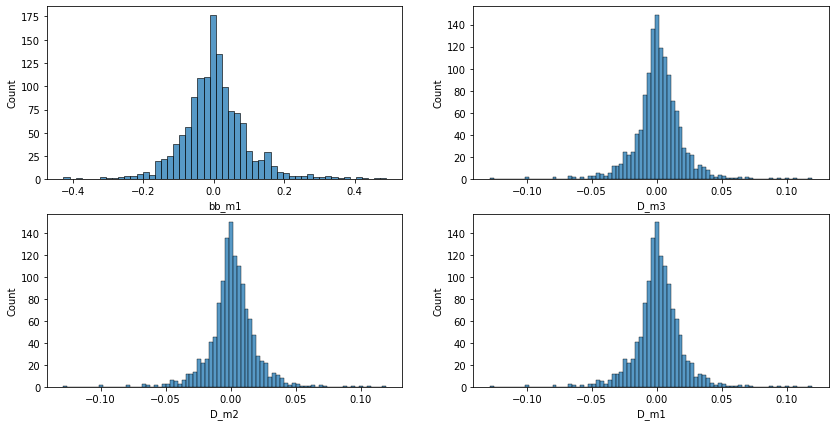

In [2]:
## Run below code to get data inclusive of Bband only with prices
%run DS105FP_ProjectScript_EdwinWan_1featureeng_final.ipynb

## Run below code to get data inclusive of MACD, MFI and BBand with prices
# %run DS105FP_ProjectScript_EdwinWan_1featureeng_initial.ipynb

### 2. Create the Ridge Regression model (base)

In [3]:
#Create the Linear Regression model
model = Ridge()
model.fit(x_train, y_train)
model

Ridge()

### 4. Predict pct_change, calculate the predicted price to compare with actual. Performance is also tested

- Predict and calculate predicted price and performance for train set

In [6]:
train_predictions = model.predict(x_train)
train_predictions

array([[0.00242059],
       [0.00250926],
       [0.00109299],
       ...,
       [0.00168454],
       [0.00149951],
       [0.00083489]])

In [7]:
pred_train = pd.DataFrame(train_predictions, columns=['pred_train'])
pred_train

,pred_train
0,0.002421
1,0.002509
2,0.001093
3,0.001668
4,0.002334
...,...
1331,0.001045
1332,0.001936
1333,0.001685
1334,0.001500


In [9]:
df_compare = dates_train.merge(y_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(pred_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(prev_train, how='left', left_index=True, right_index=True)
df_compare['actual_close']=(df_compare['Adj Close']*df_compare['prev_close'])+df_compare['prev_close']
df_compare['pred_close']=(df_compare['pred_train']*df_compare['prev_close'])+df_compare['prev_close']
df_compare

,Date,Adj Close,pred_train,prev_close,actual_close,pred_close
0,2016-02-02,-0.020222,0.002421,22.169819,21.721506,22.223483
1,2016-02-03,0.019792,0.002509,21.721506,22.151423,21.776011
2,2016-02-04,0.008035,0.001093,22.151423,22.329412,22.175634
3,2016-02-05,-0.026708,0.001668,22.329412,21.733032,22.366663
4,2016-02-08,0.010530,0.002334,21.733032,21.961880,21.783747
...,...,...,...,...,...,...
1331,2021-05-17,-0.009259,0.001045,126.912178,125.737152,127.044779
1332,2021-05-18,-0.011246,0.001936,125.737152,124.323151,125.980603
1333,2021-05-19,-0.001282,0.001685,124.323151,124.163826,124.532578
1334,2021-05-20,0.021012,0.001500,124.163826,126.772766,124.350010


In [10]:
rmse = np.sqrt(np.mean(df_compare['pred_close'] - df_compare['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare['actual_close'],df_compare['pred_close'])
r2 = r2_score(df_compare['actual_close'],df_compare['pred_close'])

print(f"The RMSE for train set is: {rmse}")
print(f"The MAPE for train set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for train set is: 0.005242175572693486
The MAPE for train set is: 0.012611703712999233
The R2 Score for test set is: 0.998133050386202


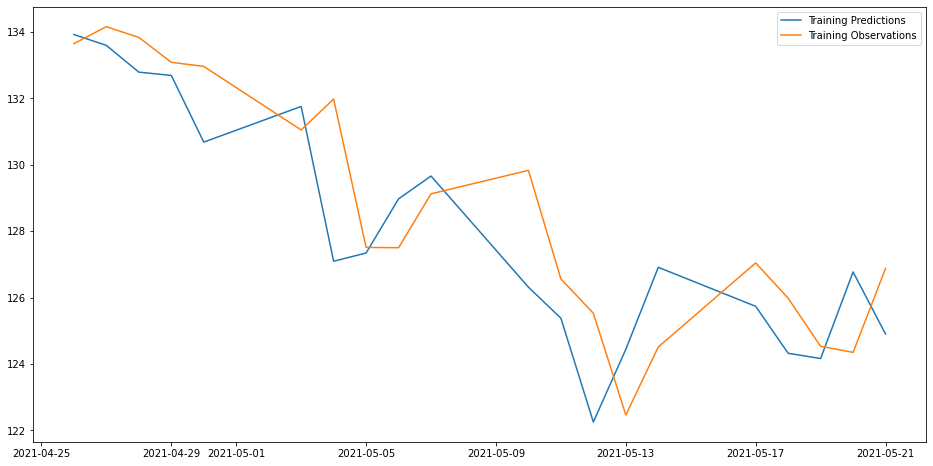

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df_compare['Date'].tail(20), df_compare['actual_close'].tail(20))
plt.plot(df_compare['Date'].tail(20), df_compare['pred_close'].tail(20))
plt.legend(['Training Predictions', 'Training Observations'])



- Predict and calculate predicted price and performance for val set

In [12]:
val_predictions = model.predict(x_val)
pred_val = pd.DataFrame(val_predictions, columns=['pred_val'])


In [13]:
df_compare2 = dates_val.reset_index(drop=True).merge(y_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(pred_val, how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(prev_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2['actual_close']=(df_compare2['Adj Close']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2['pred_close']=(df_compare2['pred_val']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2

,Date,Adj Close,pred_val,prev_close,actual_close,pred_close
0,2021-05-24,0.013314,0.002324,124.900703,126.563652,125.190960
1,2021-05-25,-0.001574,0.001115,126.563652,126.364502,126.704720
2,2021-05-26,-0.000394,0.002060,126.364502,126.314713,126.624777
3,2021-05-27,-0.012377,0.001812,126.314713,124.751335,126.543604
4,2021-05-28,-0.005348,0.002406,124.751335,124.084167,125.051533
...,...,...,...,...,...,...
105,2021-10-21,0.001474,0.001102,148.852829,149.072220,149.016871
106,2021-10-22,-0.005285,0.001182,149.072220,148.284393,149.248459
107,2021-10-25,-0.000336,0.001593,148.284393,148.234528,148.520613
108,2021-10-26,0.004575,0.001340,148.234528,148.912674,148.433175


In [14]:
rmse = np.sqrt(np.mean(df_compare2['pred_close'] - df_compare2['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare2['actual_close'],df_compare2['pred_close'])
r2 = r2_score(df_compare2['actual_close'],df_compare2['pred_close'])

print(f"The RMSE for validation set is: {rmse}")
print(f"The MAPE for validation set is: {mape}")
print(f"The R2 Score for validation set is: {r2}")

The RMSE for validation set is: 0.004798171442788595
The MAPE for validation set is: 0.009097270531799637
The R2 Score for test set is: 0.960170428670111


- Predict and calculate predicted price and performance for test set

In [15]:
test_predictions = model.predict(x_test)
pred_test = pd.DataFrame(test_predictions, columns=['pred_test'])

In [16]:
df_compare3 = dates_test.reset_index(drop=True).merge(y_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(pred_test, how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(prev_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3['actual_close']=(df_compare3['Adj Close']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3['pred_close']=(df_compare3['pred_test']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3

,Date,Adj Close,pred_test,prev_close,actual_close,pred_close
0,2021-10-28,0.024992,0.001584,148.443954,152.153809,148.679153
1,2021-10-29,-0.018156,0.000302,152.153809,149.391357,152.199698
2,2021-11-01,-0.005607,0.002326,149.391357,148.553650,149.738783
3,2021-11-02,0.007116,0.001749,148.553650,149.610764,148.813456
4,2021-11-03,0.009799,0.001441,149.610764,151.076767,149.826419
...,...,...,...,...,...,...
121,2022-04-22,-0.027821,0.001527,166.419998,161.789993,166.674057
122,2022-04-25,0.006737,0.002183,161.789993,162.880005,162.143121
123,2022-04-26,-0.037328,0.000971,162.880005,156.800003,163.038158
124,2022-04-27,-0.001467,0.002632,156.800003,156.570007,157.212748


In [17]:
rmse = np.sqrt(np.mean(df_compare3['pred_close'] - df_compare3['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare3['actual_close'],df_compare3['pred_close'])
r2 = r2_score(df_compare3['actual_close'],df_compare3['pred_close'])

print(f"The RMSE for test set is: {rmse}")
print(f"The MAPE for test set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for test set is: 0.12673145510205253
The MAPE for test set is: 0.014785791051331067
The R2 Score for test set is: 0.8765234491970904


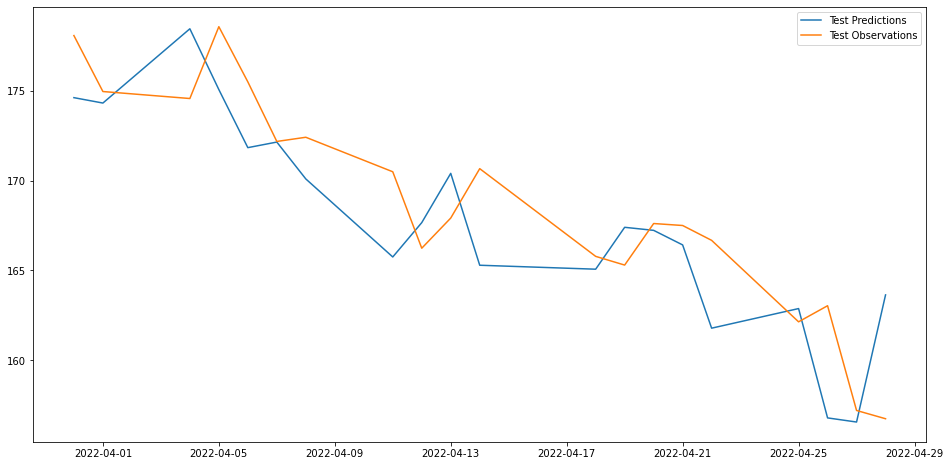

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_compare3['Date'].tail(20), df_compare3['actual_close'].tail(20))
plt.plot(df_compare3['Date'].tail(20), df_compare3['pred_close'].tail(20))
plt.legend(['Test Predictions', 'Test Observations'])

### 5. Check coefficient values to understand the weight of each features

<BarContainer object of 4 artists>

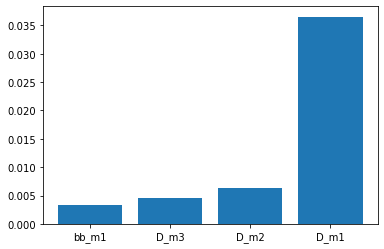

In [19]:
#check coefficient values to understand weight
array = model.coef_[-1]
df_weight = pd.DataFrame({0:list(x_train.columns),1:array})
df_weight

plt.bar(x=df_weight[0], height=abs(df_weight[1]))